## What is PCA?

PCA is a method for compressing a lot of data into something that captures the essence of the original data.

like a movie camera takes 3D information and flattens it to 2D without too much loss of information.

It is a Unsupervised learning method of dimentionality reduction that is often used to reduce the dimentionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reduce the number of variables of a data set, while preserving as much information as possible.

## Steps of PCA
1. Normalize the data
2. Find Covarience matrix of original data
3. Compute eign values and eign vectors of covarience matrics
4. Identify the Principal Component (Axis which capture most of the variation)
5. Choosing components and forming a feature vector


In [27]:
# import some useful libraries
import numpy as np # to calculate EV's and covarience matrix
import pandas as pd # to put data into dataframe for visualize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Generating random data
columns = ['breakfast', 'lunch', 'dinner', 'exercise']
original_data = np.random.randint(low = 1,high = 3,size=[10,4]) # generate random number from 1 to 10 as 10*5 matrices
df = pd.DataFrame(original_data, columns=columns)
df
# this data show 10 people's data of their breakfast, lunch, dinner and exercise time in hours.

,breakfast,lunch,dinner,exercise
0,1,2,2,2
1,2,2,2,2
2,1,1,2,2
3,1,1,2,1
4,2,2,2,2
5,1,1,1,1
6,2,1,2,2
7,1,1,2,2
8,1,2,1,2
9,1,1,2,2


### 1. Normalize the data

In [164]:
scaled_data = np.empty([10,4])
print(scaled_data[:,0])
for i in range(4):
    scaled_data[:,i] = (original_data[:,i] - np.mean(original_data[:,i])) / np.std(original_data[:,i])
scaled_data

[0.65465367 1.52752523 0.65465367 0.65465367 1.52752523 0.65465367
 1.52752523 0.65465367 0.65465367 0.65465367]
[-0.65465367  1.52752523 -0.65465367 -0.65465367  1.52752523 -0.65465367
  1.52752523 -0.65465367 -0.65465367 -0.65465367]


array([[-0.65465367,  1.22474487,  0.5       ,  0.5       ],
       [ 1.52752523,  1.22474487,  0.5       ,  0.5       ],
       [-0.65465367, -0.81649658,  0.5       ,  0.5       ],
       [-0.65465367, -0.81649658,  0.5       , -2.        ],
       [ 1.52752523,  1.22474487,  0.5       ,  0.5       ],
       [-0.65465367, -0.81649658, -2.        , -2.        ],
       [ 1.52752523, -0.81649658,  0.5       ,  0.5       ],
       [-0.65465367, -0.81649658,  0.5       ,  0.5       ],
       [-0.65465367,  1.22474487, -2.        ,  0.5       ],
       [-0.65465367, -0.81649658,  0.5       ,  0.5       ]])

## 2. Covarience matrices

In [1]:
covarience = np.cov(scaled_data , rowvar=False)  # rowvar set to false so it take covarience column wise
covarience

NameError: name 'np' is not defined

## 3. Compute Eign values and Eign vectors

In [2]:
eign_val , eign_vct = np.linalg.eig(covarience)
print("Eign values : \n ",eign_val)
print("Eign vectors : \n",eign_vct)

NameError: name 'np' is not defined

## 4. Finding Principal Component

Principal component is a axis which contains the projection of eign vectors on it

In [116]:
# sorting eignvectors as well as eign values
sort_index = eign_val.argsort()[::-1]
sorted_eign_val = eign_val[sort_index[0:2]]
sorted_eign_vct = eign_vct[:,sort_index[0:2]]
print("sorted_eign_val : \n",sorted_eign_val)
print("sorted_eign_vct : \n",sorted_eign_vct)

sorted_eign_val : 
 [2.08712526 1.2241376 ]
sorted_eign_vct : 
 [[ 0.54777756  0.00796859]
 [ 0.44650461 -0.67890013]
 [ 0.40106608  0.7341499 ]
 [ 0.58285451  0.00741936]]


## 5. Choosing component and forming vector

In [121]:
forming_vector = scaled_data.dot(sorted_eign_vct)
forming_vector

array([[ 0.68020994, -0.46591149],
       [ 1.87555857, -0.44852261],
       [-0.23121379,  0.9198876 ],
       [-1.68835006,  0.9013392 ],
       [ 1.87555857, -0.44852261],
       [-2.69101525, -0.93403554],
       [ 0.96413485,  0.93727648],
       [-0.23121379,  0.9198876 ],
       [-0.32245526, -2.30128623],
       [-0.23121379,  0.9198876 ]])

In [144]:
reduced_data = pd.DataFrame(forming_vector,columns = ['PC1','PC2'])
reduced_data

,PC1,PC2
0,0.680210,-0.465911
1,1.875559,-0.448523
2,-0.231214,0.919888
3,-1.688350,0.901339
4,1.875559,-0.448523
5,-2.691015,-0.934036
6,0.964135,0.937276
7,-0.231214,0.919888
8,-0.322455,-2.301286
9,-0.231214,0.919888


In [145]:
import seaborn as sns
%matplotlib inline

Text(0.5,1,'PCA result')

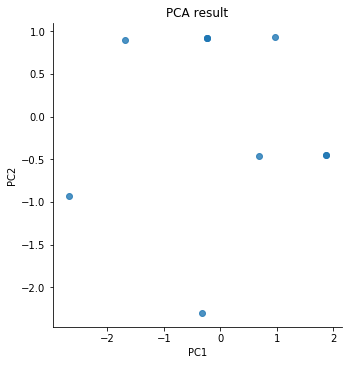

In [169]:
sns.lmplot('PC1', 'PC2', data=reduced_data, fit_reg=False) 
plt.title('PCA result')

This represent 4 different cluster of our 4 columns in 2 D graph